In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

In [2]:
# Load dataset
df = pd.read_csv("pricerunner_aggregate.csv")

# Show first few rows
df.head()


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      35311 non-null  int64 
 1   Product Title   35311 non-null  object
 2   Merchant ID     35311 non-null  int64 
 3   Cluster ID      35311 non-null  int64 
 4   Cluster Label   35311 non-null  object
 5   Category ID     35311 non-null  int64 
 6   Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


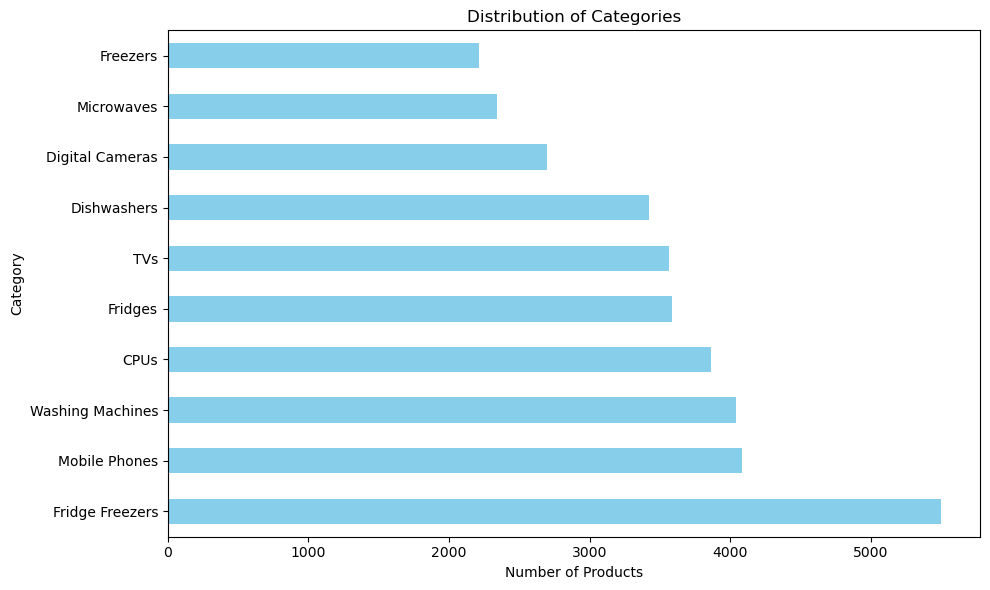

In [6]:
plt.figure(figsize=(10, 6))
df['Category Label'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [7]:
# Use Product Title as input and Category Label as output
X = df['Product Title']
y = df['Category Label']

In [8]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = vectorizer.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9299164660908962
Precision (macro): 0.9448532926827543
Recall (macro): 0.9185189591964008
F1 Score (macro): 0.9263873672320203

Classification Report:

                  precision    recall  f1-score   support

            CPUs       1.00      0.99      1.00       771
 Digital Cameras       0.99      1.00      0.99       542
     Dishwashers       0.88      0.97      0.92       662
        Freezers       0.97      0.59      0.74       439
 Fridge Freezers       0.80      0.92      0.85      1115
         Fridges       0.86      0.81      0.84       728
      Microwaves       0.99      0.95      0.97       469
   Mobile Phones       1.00      1.00      1.00       818
             TVs       0.98      0.99      0.98       723
Washing Machines       0.98      0.95      0.97       796

        accuracy                           0.93      7063
       macro avg       0.94      0.92      0.93      7063
    weighted avg       0.93      0.93      0.93      7063



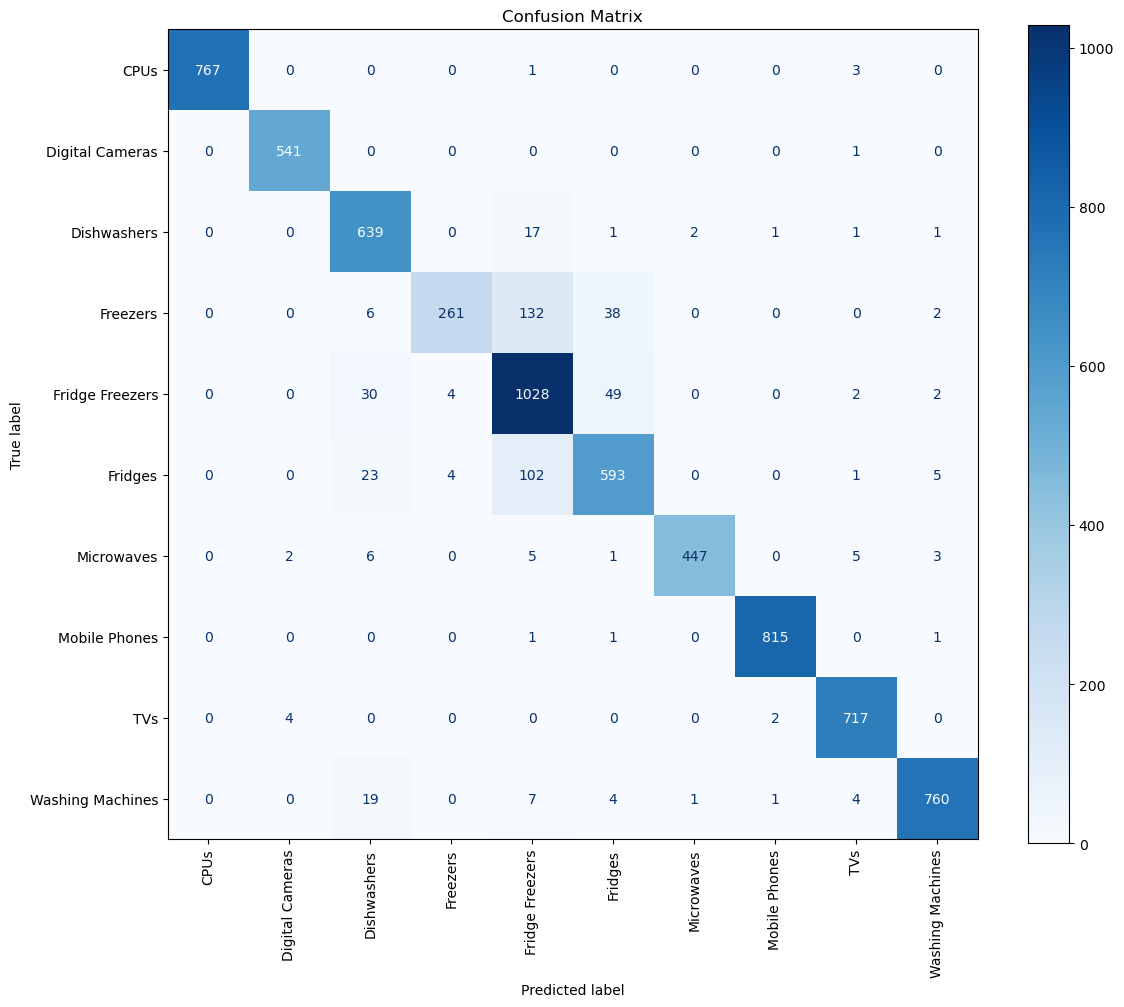

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()